<a href="https://colab.research.google.com/github/Ad-Chekk/ML_models/blob/main/RNN_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 19ms/step - accuracy: 0.8183 - loss: 0.5821 - val_accuracy: 0.9425 - val_loss: 0.1970
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 9ms/step - accuracy: 0.9397 - loss: 0.2063 - val_accuracy: 0.9544 - val_loss: 0.1603
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.9509 - loss: 0.1761 - val_accuracy: 0.9493 - val_loss: 0.1891
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.9533 - loss: 0.1651 - val_accuracy: 0.9634 - val_loss: 0.1263
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9577 - loss: 0.1523 - val_accuracy: 0.9414 - val_loss: 0.1965
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 10ms/step - accuracy: 0.9607 - loss: 0.1395 - val_accuracy: 0.9643 - val_loss: 0.1257
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.9617 - loss: 0.1343 - val_accuracy: 0.9629 - val_loss: 0.1354
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.9621 - loss

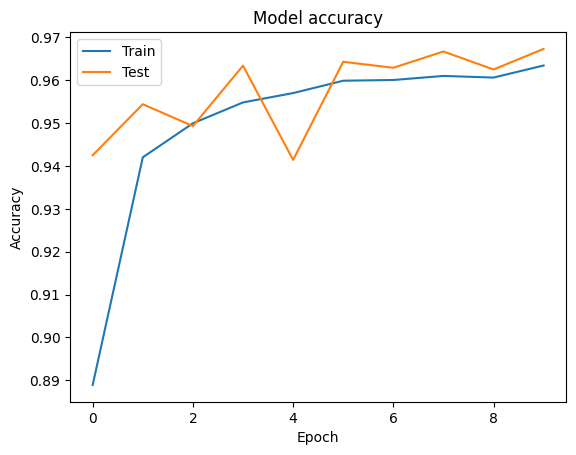

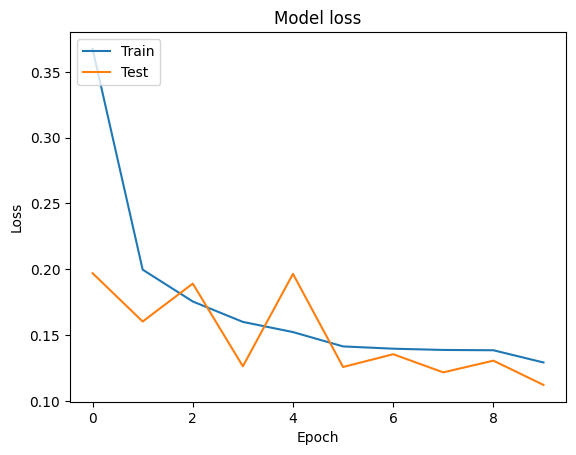

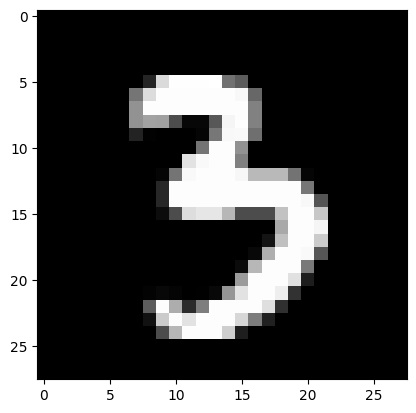

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
Predicted label: 3
Actual label: 3
Prediction is correct!


In [ ]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Reshape input data for LSTM (timesteps, features)
x_train = x_train.reshape(x_train.shape[0], 28, 28)
x_test = x_test.reshape(x_test.shape[0], 28, 28)

# Define LSTM model
model = Sequential()
model.add(SimpleRNN(128, input_shape=(28, 28)))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print('Test accuracy:', accuracy)
print('Test loss:',loss)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

index = np.random.randint(0, len(x_test))
image = x_test[index]

plt.imshow(image, cmap='gray')
plt.show()

prediction = model.predict(image.reshape(1, 28, 28, 1))
predicted_label = np.argmax(prediction)

actual_label = np.argmax(y_test[index])

print("Predicted label:", predicted_label)
print("Actual label:", actual_label)

if predicted_label == actual_label:
  print("Correct pred !")
else:
  print("pred incorrect")